# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json 
from pprint import pprint
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
print(weather_api_key)

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

1798abba1a9f1dbd7feee943bf7ab2cd


In [2]:
# !pip install citipy

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# url = "http://api.openweathermap.org/data/2.5/weather?q=&appid=[weather_api_key]"
# print(url)
url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&appid&"
url_list=[]
url_dict = {'City': [], 'Lat':[], 'Lon':[], 'Temp':[], 'Humidity': [], 'Cloudiness':[], 'Windspeed':[], 'Country':[]}
for towns in cities:
    print(f'Getting {towns}')
    query_url = url + "appid=" + weather_api_key + "&q=" + towns
    response = requests.get(query_url).json()
#     print(response)
    try:
        
        url_list.append(response)
        url_dict['City'].append(response['name'])
        url_dict['Lat'].append(response['coord']['lat'])
        url_dict['Lon'].append(response['coord']['lon'])
        url_dict['Temp'].append(response['main']['temp'])
        url_dict['Humidity'].append(response['main']['humidity'])
        url_dict['Cloudiness'].append(response['clouds']['all'])
        url_dict['Windspeed'].append(response['wind']['speed'])
        url_dict['Country'].append(response['sys']['country'])
    except (KeyError,IndexError):
        print("not found")

Getting nikolskoye
Getting qaanaaq
Getting port hedland
Getting luderitz
Getting butaritari
Getting taolanaro
not found
Getting sumbawanga
Getting yellowknife
Getting izumo
Getting carnarvon
Getting vaini
Getting maldonado
Getting saint anthony
Getting hobart
Getting yialos
not found
Getting ahuimanu
Getting busselton
Getting arraial do cabo
Getting shadrinsk
Getting albany
Getting tasiilaq
Getting pevek
Getting bredasdorp
Getting rikitea
Getting leningradskiy
Getting kodiak
Getting port alfred
Getting guadix
Getting victoria
Getting padang
Getting vieques
Getting souillac
Getting namibe
Getting clyde river
Getting okhotsk
Getting cidreira
Getting warangal
Getting kenai
Getting longyearbyen
Getting goundi
Getting mataura
Getting bauta
Getting kungurtug
Getting kavaratti
Getting luanda
Getting hermanus
Getting kemijarvi
Getting matara
Getting bundaberg
Getting wakkanai
Getting noumea
Getting luebo
Getting aguimes
Getting kang
Getting bembereke
Getting raudeberg
Getting nizhneyansk
not f

Getting wageningen
Getting nara
Getting hervey bay
Getting moree
Getting ribas do rio pardo
Getting dwarka
Getting petatlan
Getting yarkovo
Getting sanger
Getting barcelona
Getting kiruna
Getting kalawit
Getting mahibadhoo
Getting mezen
Getting dryden
Getting novyy urengoy
Getting yenagoa
Getting gilgit
Getting jinchang
Getting karratha
Getting hay river
Getting warrington
Getting vanimo
Getting daru
Getting luangwa
Getting yarmouth
Getting rawson
Getting bengkulu
Getting ajdabiya
Getting prince rupert
Getting fairbanks
Getting wagar
Getting novoagansk
Getting beaufort
Getting half moon bay
Getting gazimagusa
not found
Getting san quintin
Getting yulara
Getting sanary-sur-mer
Getting puerto madero
Getting yumen
Getting roma
Getting shelburne
Getting mapiri
Getting mehamn
Getting kutum
Getting erzin
Getting guerrero negro
Getting abu samrah
Getting tabory
Getting karaul
not found
Getting candido mendes
Getting goya
Getting puerto narino
Getting dzhusaly
not found
Getting cabedelo
Gettin

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
url_df=pd.DataFrame(url_dict)
# url_df= pd.DataFrame(url_list)
url_df

,City,Lat,Lon,Temp,Humidity,Cloudiness,Windspeed,Country
0,Nikolskoye,59.7035,30.7861,33.26,80,90,6.71,RU
1,Qaanaaq,77.4840,-69.3632,12.45,58,100,9.06,GL
2,Port Hedland,-20.3167,118.5667,78.80,83,9,13.80,AU
3,Lüderitz,-26.6481,15.1594,65.37,83,0,8.28,NA
4,Butaritari,3.0707,172.7902,81.14,77,54,14.38,KI
...,...,...,...,...,...,...,...,...
561,Edineţ,48.1681,27.3050,39.99,76,80,8.99,MD
562,Vestmannaeyjar,63.4427,-20.2734,43.86,76,100,33.55,IS
563,Muriwai Beach,-36.8167,174.4500,70.02,79,54,8.01,NZ
564,Marabu,4.4148,114.0089,75.20,100,40,4.79,MY


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [13]:
url_df[url_df['Humidity']<100]
cleaned_df=url_df[url_df['Humidity']<100]
print(cleaned_df)

               City      Lat       Lon   Temp  Humidity  Cloudiness  \
0        Nikolskoye  59.7035   30.7861  33.26        80          90   
1           Qaanaaq  77.4840  -69.3632  12.45        58         100   
2      Port Hedland -20.3167  118.5667  78.80        83           9   
3          Lüderitz -26.6481   15.1594  65.37        83           0   
4        Butaritari   3.0707  172.7902  81.14        77          54   
..              ...      ...       ...    ...       ...         ...   
560          Hohhot  40.8106  111.6522  30.20        80          40   
561          Edineţ  48.1681   27.3050  39.99        76          80   
562  Vestmannaeyjar  63.4427  -20.2734  43.86        76         100   
563   Muriwai Beach -36.8167  174.4500  70.02        79          54   
565        Bilibino  68.0546  166.4372 -17.18        75           0   

     Windspeed Country  
0         6.71      RU  
1         9.06      GL  
2        13.80      AU  
3         8.28      NA  
4        14.38      KI

In [10]:
#  Get the indices of cities that have humidity over 100%.


In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [72]:
cleaned_df.to_csv("../output_data/cities.csv", index_label="City_ID")


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

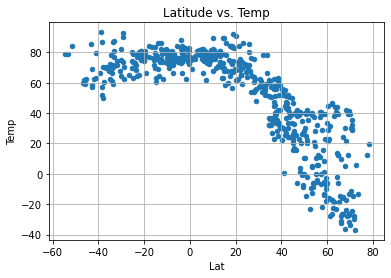

In [85]:
# Temp_Plot_plt = url_df.plot(kind="scatter",x='Lat', y='Temp', title="Lat vs. Temp", grid=True)
Temp_Plot_plt = cleaned_df.plot(kind="scatter",x='Lat', y='Temp', title="Latitude vs. Temp", grid=True)
# plt.savefig("starter_code/LatVsTemp.png")
plt.savefig("../output_data/LatVsTemp.png")

## Latitude vs. Humidity Plot

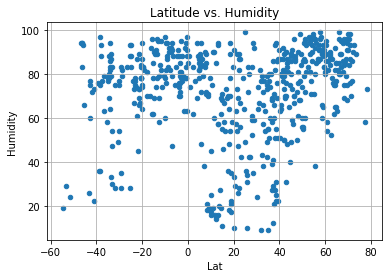

In [86]:
Humid_Plot_plt= cleaned_df.plot(kind="scatter",x='Lat', y='Humidity', title="Latitude vs. Humidity", grid=True)
plt.savefig("../output_data/LatVsHumidity.png")

## Latitude vs. Cloudiness Plot

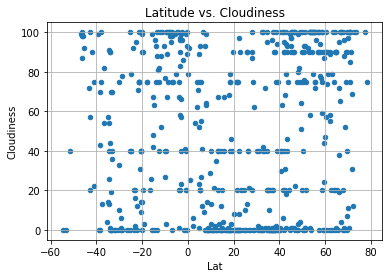

In [87]:
Cloudiness_Plot_plt=cleaned_df.plot(kind="scatter",x='Lat', y='Cloudiness', title="Latitude vs. Cloudiness", grid=True)
plt.savefig("../output_data/LatVsCloudiness.png")

## Latitude vs. Wind Speed Plot

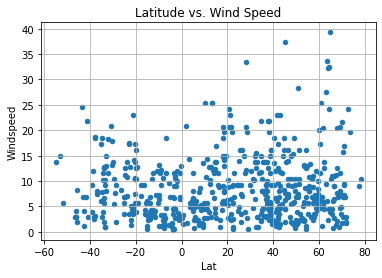

In [91]:
Wind_Speed_Plot_plt = cleaned_df.plot(kind="scatter",x='Lat', y='Windspeed', title="Latitude vs. Wind Speed", grid=True)
plt.savefig("../output_data/LatVsWindspeed.png")

## Linear Regression

In [20]:
north_df=cleaned_df[cleaned_df['Lat']>=0] 
south_df=cleaned_df[cleaned_df['Lat']<0]
print(north_df)
print(south_df)

               City      Lat       Lon   Temp  Humidity  Cloudiness  \
0        Nikolskoye  59.7035   30.7861  33.26        80          90   
1           Qaanaaq  77.4840  -69.3632  12.45        58         100   
4        Butaritari   3.0707  172.7902  81.14        77          54   
6       Yellowknife  62.4560 -114.3525 -22.38        52          20   
7             Izumo  35.3667  132.7667  32.00        80           0   
..              ...      ...       ...    ...       ...         ...   
558            Hofn  64.2539  -15.2082  43.79        82         100   
560          Hohhot  40.8106  111.6522  30.20        80          40   
561          Edineţ  48.1681   27.3050  39.99        76          80   
562  Vestmannaeyjar  63.4427  -20.2734  43.86        76         100   
565        Bilibino  68.0546  166.4372 -17.18        75           0   

     Windspeed Country  
0         6.71      RU  
1         9.06      GL  
4        14.38      KI  
6        12.66      CA  
7        10.36      JP

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

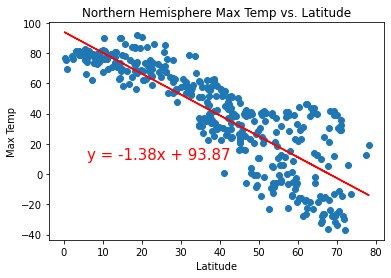

<Figure size 432x288 with 0 Axes>

In [77]:
x_values = north_df['Lat']
y_values = north_df['Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Northern Hemisphere Max Temp vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()
plt.savefig("../output_data/NorthHemTempVsLat.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

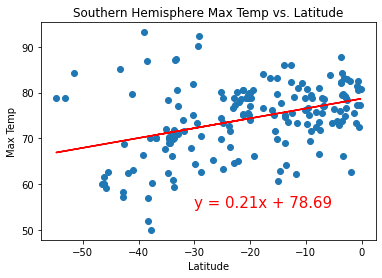

<Figure size 432x288 with 0 Axes>

In [78]:
x_values = south_df['Lat']
y_values = south_df['Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,55),fontsize=15,color="red")
plt.title('Southern Hemisphere Max Temp vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()
plt.savefig("../output_data/SouthHemTempVsLat.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

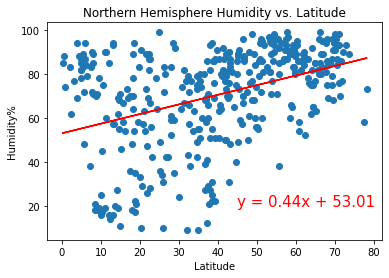

<Figure size 432x288 with 0 Axes>

In [79]:
x_values = north_df['Lat']
y_values = north_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,20),fontsize=15,color="red")
plt.title('Northern Hemisphere Humidity vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity%')
plt.show()
plt.savefig("../output_data/NorthHemHumidityVsLat.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

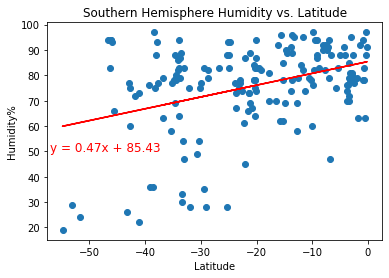

<Figure size 432x288 with 0 Axes>

In [80]:
x_values = south_df['Lat']
y_values = south_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-57,50),fontsize=12,color="red")
plt.title('Southern Hemisphere Humidity vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity%')
plt.show()
plt.savefig("../output_data/SouthHemHumidityVsLat.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

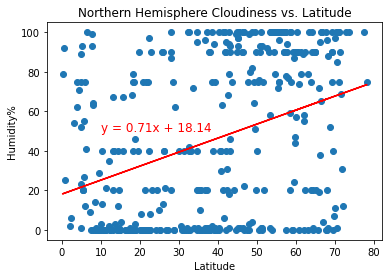

<Figure size 432x288 with 0 Axes>

In [81]:
x_values = north_df['Lat']
y_values = north_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,50),fontsize=12,color="red")
plt.title('Northern Hemisphere Cloudiness vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity%')
plt.show()
plt.savefig("../output_data/NorthHemCloudinessVsLat.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

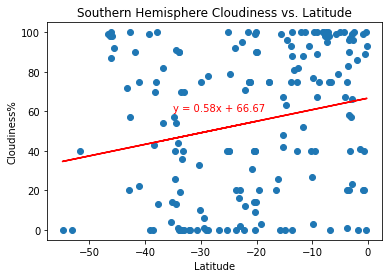

<Figure size 432x288 with 0 Axes>

In [82]:
x_values = south_df['Lat']
y_values = south_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,60),fontsize=10,color="red")
plt.title('Southern Hemisphere Cloudiness vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness%')
plt.show()
plt.savefig("../output_data/SouthHemCloudinessVsLat.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

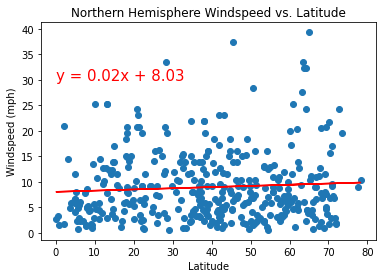

<Figure size 432x288 with 0 Axes>

In [83]:
x_values = north_df['Lat']
y_values = north_df['Windspeed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,30),fontsize=15,color="red")
plt.title('Northern Hemisphere Windspeed vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Windspeed (mph)')
plt.show()
plt.savefig("../output_data/NorthHemWindspeedVsLat.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

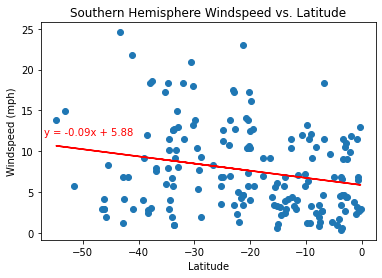

<Figure size 432x288 with 0 Axes>

In [84]:
x_values = south_df['Lat']
y_values = south_df['Windspeed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-57,12),fontsize=10,color="red")
plt.title('Southern Hemisphere Windspeed vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Windspeed (mph)')
plt.show()
plt.savefig("../output_data/SouthHemWindspeedVsLat.png")